In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
file_path =  '/content/drive/My Drive/Capstone/input_data.xlsx'
df =  pd.read_excel(file_path)
df = df.drop(df.index[[2604,3383,3906,3910,3915,3921,3924,4341,4395]])
df = df.drop(['Caller'],axis=1)

In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

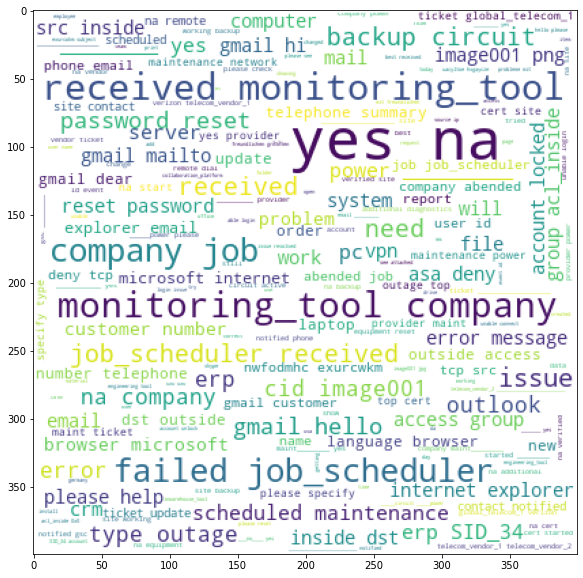

In [5]:
desc = " ".join(des for des in df.Description)

wc_desc = WordCloud(background_color='white', max_words=200, width=400, height=400,random_state=10).generate(desc)
plt.figure(figsize=(10,10))
plt.imshow(wc_desc)

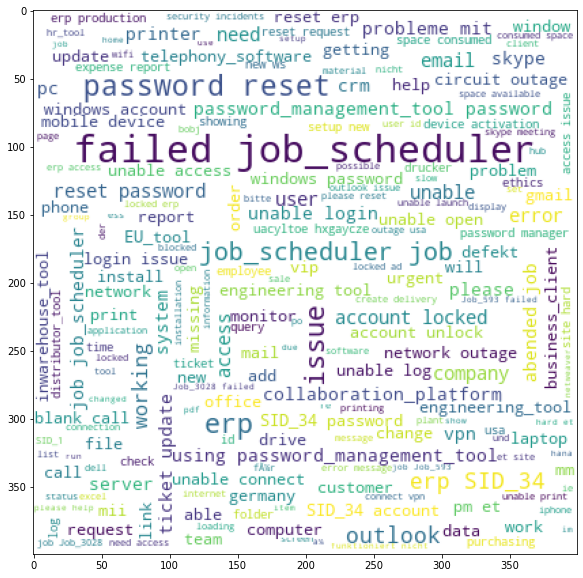

In [8]:
sh_desc = " ".join(sh_des for sh_des in df['Short description'])

wc_sh_desc = WordCloud(background_color='white', max_words=200, width=400, height=400,random_state=10).generate(sh_desc)
plt.figure(figsize=(10,10))
plt.imshow(wc_sh_desc)

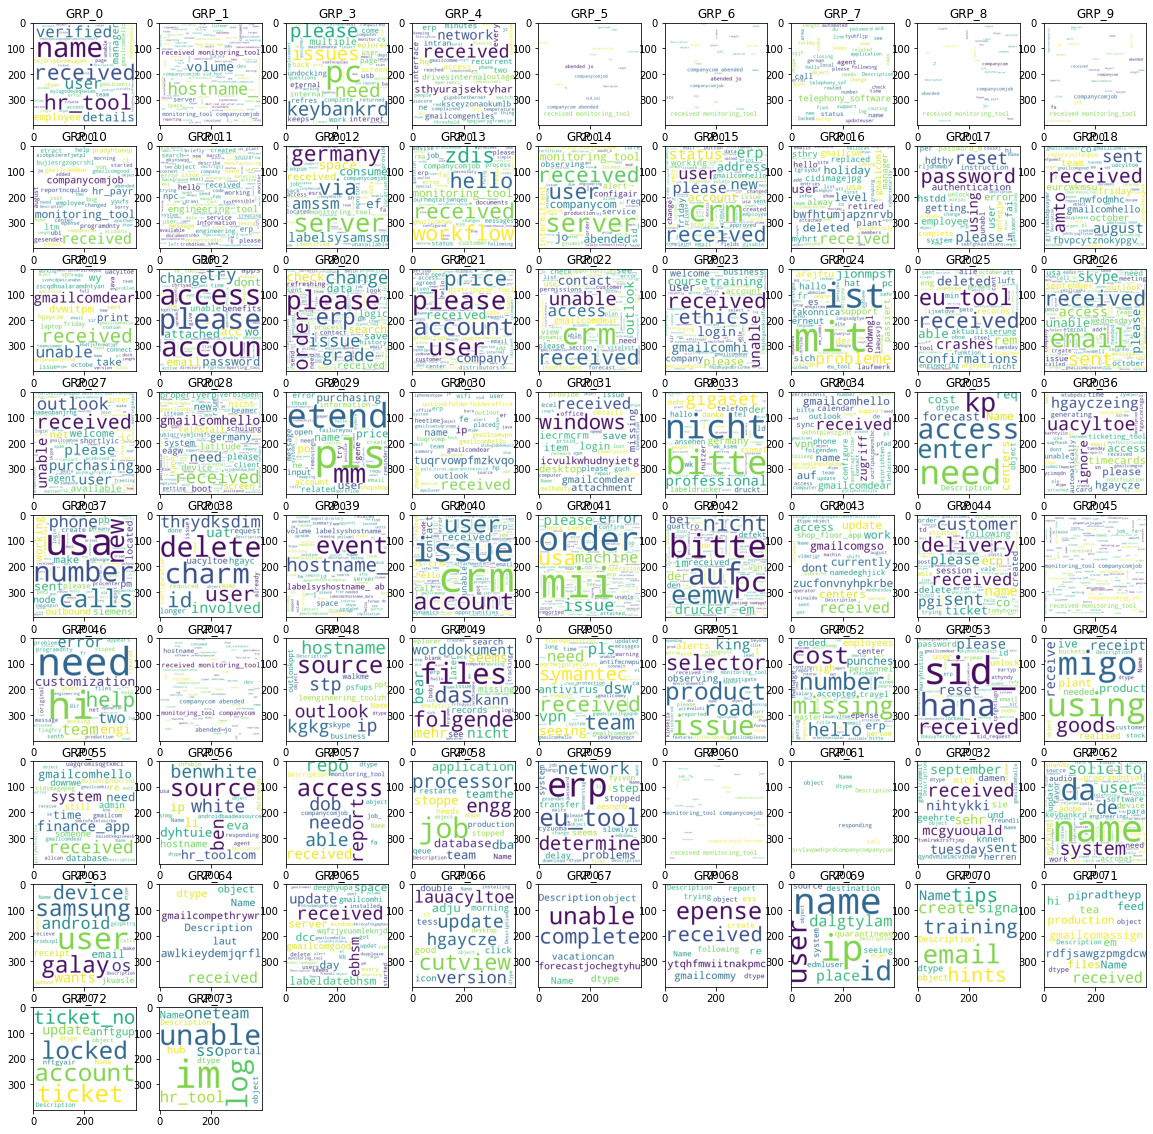

In [18]:
plt.figure(figsize=(20,20))

for index, i in enumerate(df['Assignment group'].unique()):
  s = str(i)
  i = str(df[df['Assignment group']==s].Description)
  i = WordCloud(background_color='white', max_words=200, width=400, height=400,random_state=10).generate(i)
  c = index+1
  plt.subplot(9,9,c)
  plt.imshow(i)
  plt.title(s)

In [0]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Description'] = df['Description'].apply(clean_text)
df['Description'] = df['Description'].str.replace('\d+', '')

In [10]:
df.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 3 columns]

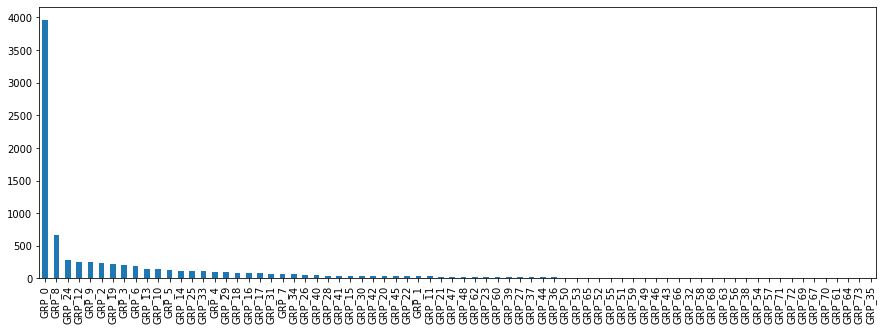

In [11]:
plt.figure(figsize=(15,5))
df['Assignment group'].value_counts().plot(kind = 'bar')

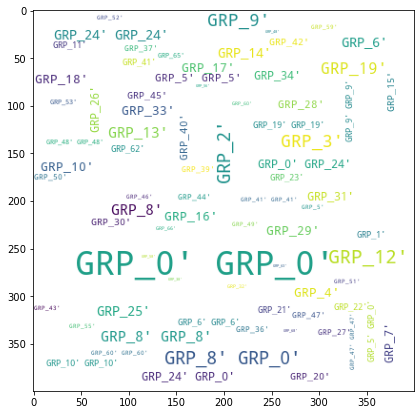

In [12]:
group = str(df['Assignment group'].values.tolist())

wc_group = WordCloud(background_color='white', max_words=200, width=400, height=400).generate(group)
plt.figure(figsize=(7,7))
plt.imshow(wc_group)

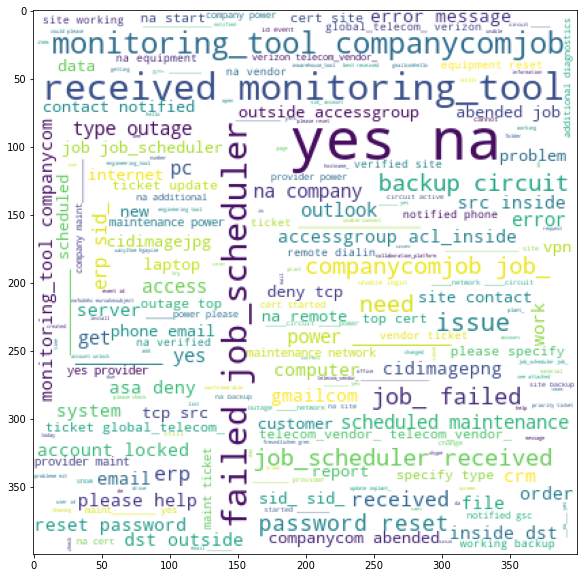

In [13]:
desc = " ".join(des for des in df.Description)

wc_desc = WordCloud(background_color='white',stopwords=STOPWORDS, max_words=200, width=400, height=400,random_state=10).generate(desc)
plt.figure(figsize=(10,10))
plt.imshow(wc_desc)

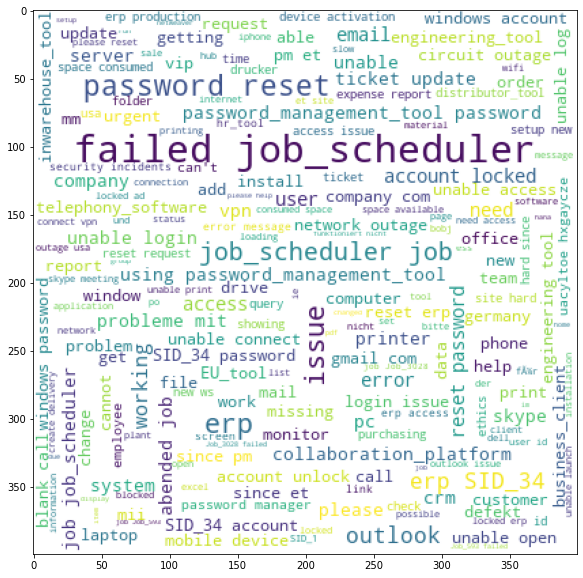

In [16]:
sh_desc = " ".join(sh_des for sh_des in df['Short description'])

wc_sh_desc = WordCloud(background_color='white',stopwords=STOPWORDS, max_words=200, width=400, height=400,random_state=10).generate(sh_desc)
plt.figure(figsize=(10,10))
plt.imshow(wc_sh_desc)

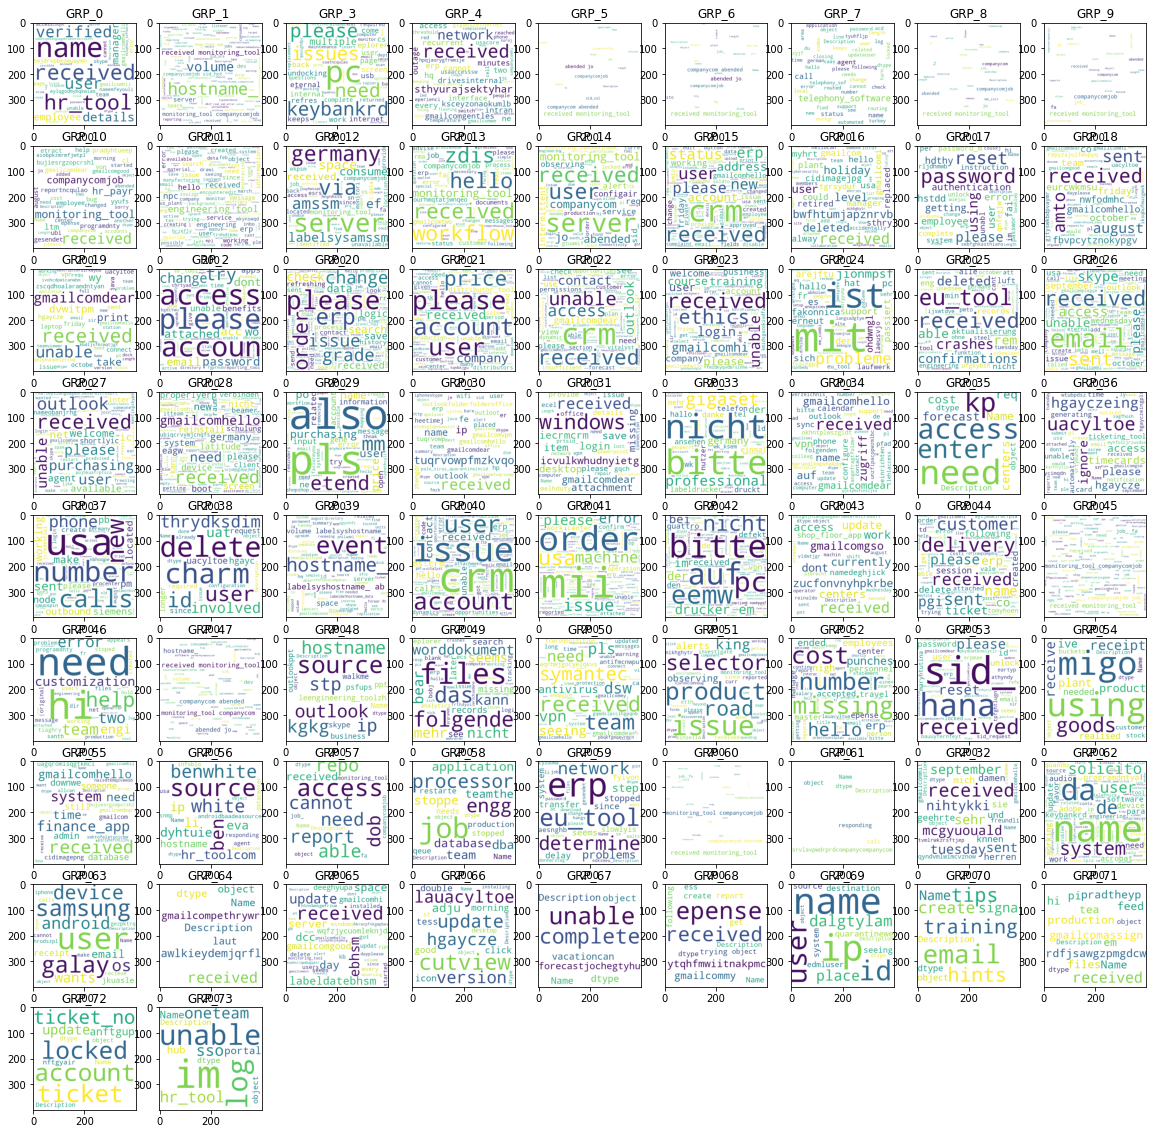

In [19]:
plt.figure(figsize=(20,20))

for index, i in enumerate(df['Assignment group'].unique()):
  s = str(i)
  i = str(df[df['Assignment group']==s].Description)
  i = WordCloud(background_color='white',stopwords=STOPWORDS, max_words=200, width=400, height=400,random_state=10).generate(i)
  c = index+1
  plt.subplot(9,9,c)
  plt.imshow(i)
  plt.title(s)

In [0]:
max_features = 1000
maxlen = 1000 ## Add your max length here ##
embedding_size = 200
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Description'])

In [0]:
X = tokenizer.texts_to_sequences(df['Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['Assignment group'])


In [0]:
y = pd.get_dummies(df['Assignment group']).values

In [0]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
model = Sequential()
model.add(Embedding(maxlen, embedding_size, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(74, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
96/96 [==============================] - 369s 4s/step - loss: 2.6923 - accuracy: 0.4702 - val_loss: 2.2896 - val_accuracy: 0.5309
Epoch 2/5
96/96 [==============================] - 372s 4s/step - loss: 2.0373 - accuracy: 0.5483 - val_loss: 1.9616 - val_accuracy: 0.5765
Epoch 3/5
96/96 [==============================] - 368s 4s/step - loss: 1.8185 - accuracy: 0.5776 - val_loss: 1.8560 - val_accuracy: 0.5794
Epoch 4/5
96/96 [==============================] - 372s 4s/step - loss: 1.6892 - accuracy: 0.5929 - val_loss: 1.7634 - val_accuracy: 0.5941
Epoch 5/5
96/96 [==============================] - 372s 4s/step - loss: 1.5965 - accuracy: 0.6068 - val_loss: 1.7034 - val_accuracy: 0.6118
